## DQN baselines LSTM 

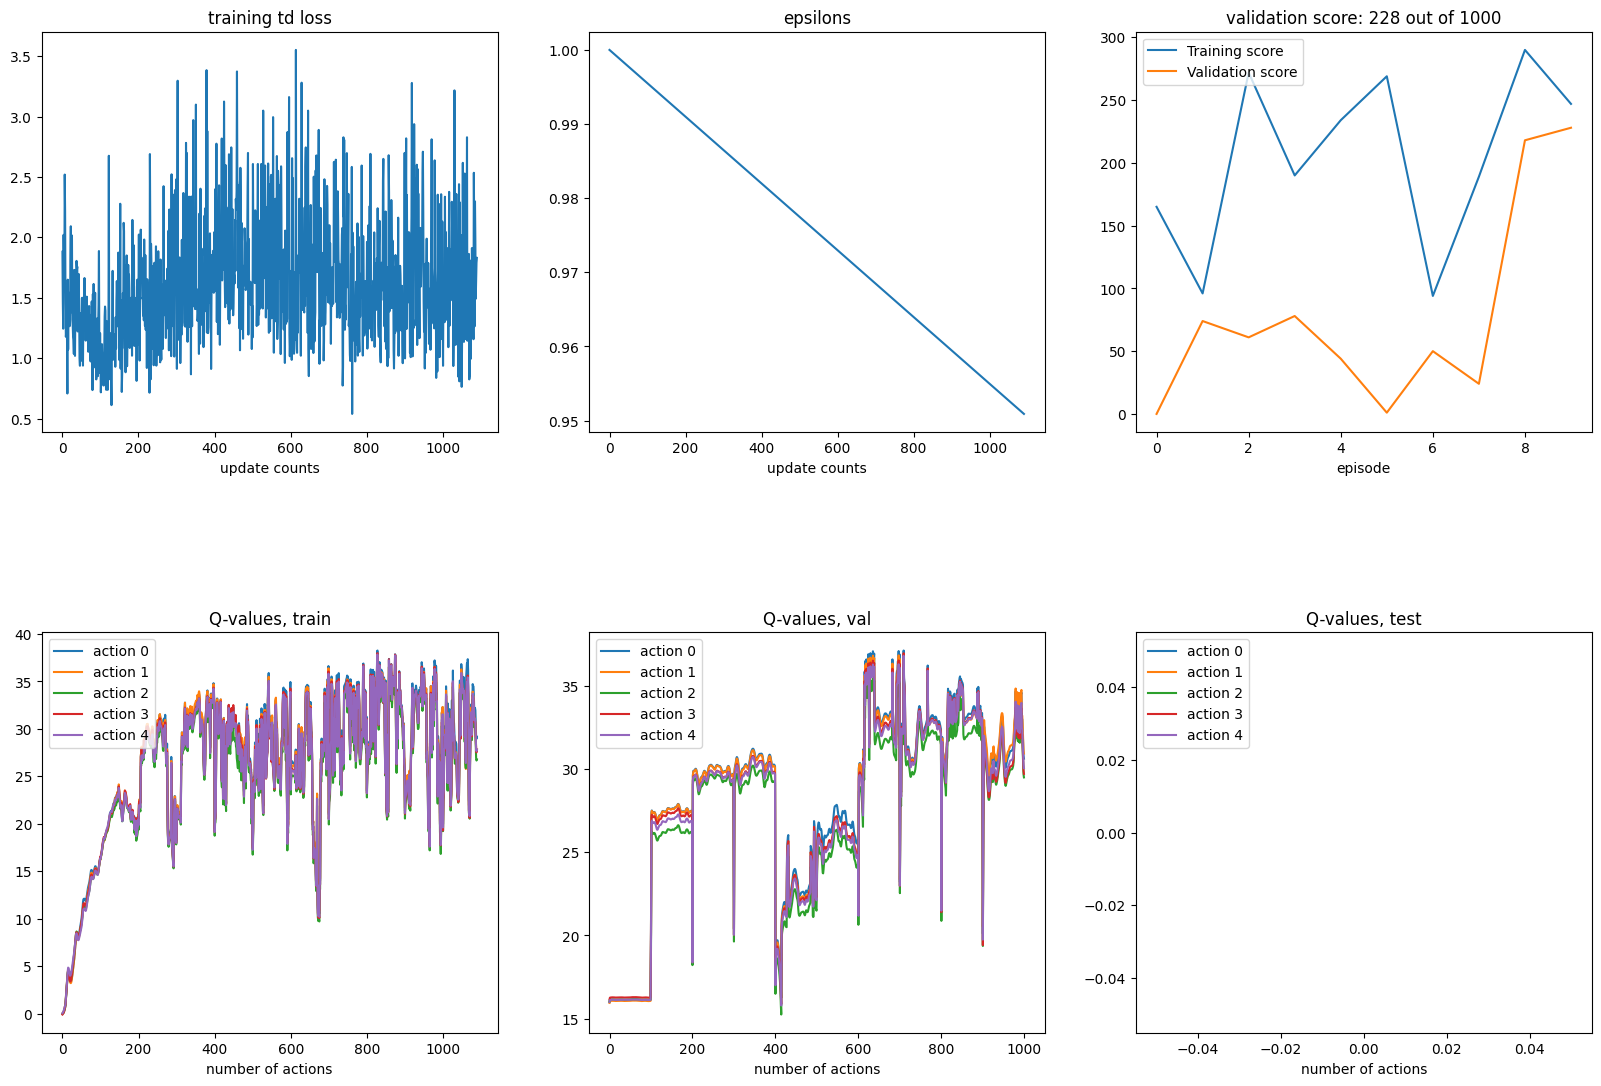

  0%|          | 0/20 [2:23:56<?, ?it/s]


KeyboardInterrupt: 

In [1]:
from agent import DQNLSTMBaselineAgent
import logging
from tqdm.auto import tqdm
import random

logger = logging.getLogger()
logger.disabled = True

params_all = []
for history_block_size in [12, 24, 48, 100]:
    for test_seed in range(5):

        num_iterations = 100 * 200
        batch_size = 32
        question_interval = 1
        room_size = "l"
        terminates_at = 99

        params = {
            "env_str": "room_env:RoomEnv-v2",
            "num_iterations": num_iterations,
            "replay_buffer_size": num_iterations,
            "warm_start": num_iterations // 10,
            "batch_size": batch_size,
            "target_update_interval": 10,
            "epsilon_decay_until": num_iterations,
            "max_epsilon": 1.0,
            "min_epsilon": 0.1,
            "gamma": 0.9,
            "history_block_size": history_block_size,
            "nn_params": {
                "hidden_size": 128,
                "num_layers": 2,
                "embedding_dim": 128,
                "fuse_information": "sum",
                "include_positional_encoding": True,
                "max_timesteps": 100,
                "max_strength": 100,
            },
            "run_test": True,
            "num_samples_for_results": 10,
            "train_seed": test_seed + 5,
            "test_seed": test_seed,
            "device": "cpu",
            "env_config": {
                "question_prob": 1.0,
                "terminates_at": 99,
                "randomize_observations": "objects",
                "room_size": room_size,
                "rewards": {"correct": 1, "wrong": 0, "partial": 0},
                "make_everything_static": False,
                "num_total_questions": 1000,
                "question_interval": question_interval,
                "include_walls_in_observations": True,
                "deterministic_objects": False,
            },
            "ddqn": True,
            "dueling_dqn": True,
            "default_root_dir": f"./training-results/baselines/history_block_size={history_block_size}/",
            "run_handcrafted_baselines": True,
        }
        params_all.append(params)

for params in tqdm(params_all):
    agent = DQNLSTMBaselineAgent(**params)
    agent.train()